# Classification of sms messages

In [ ]:
%matplotlib inline

In this task we will use the SMS Spam collection data from the UCI repository.
The data file is located [at the link](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/), download and unzip it.

### Downloading, visualization and preliminary analysis of data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("SMSSpamCollection", \
                  sep="\t", \
                  header=None,\
                  names=["label", "sms"])

Let's look at the first ten lines:

In [ ]:
data.head(10)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


The first column stores labels (spam or not spam), the second column contains the text of the message.

Посмотрим, сколько всего объектов:

In [ ]:
len(data)

5572

Let's see how many objects of each class:

<AxesSubplot:title={'center':'Число сообщений спам / не спам'}>

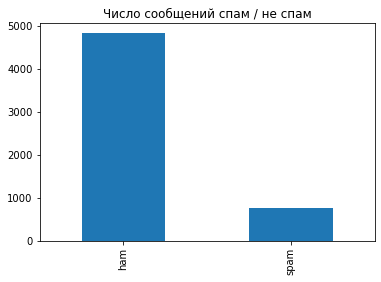

In [ ]:
counts = data["label"].value_counts()
counts.plot(kind='bar', title="Число сообщений спам / не спам")

In [ ]:
counts

ham     4825
spam     747
Name: label, dtype: int64

There is much more non-spam than spam in the sample.

### Data preprocessing

There are no selected features in the data yet. For texts we can use a simple transformation -- "bag of words". Create a dictionary of all the words that appear in sms. For each text object we get as many attributes as there are words in the dictionary and each attribute contains 1 (word included) or 0 (word not included). There is a special tool in sklearn for this purpose:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data["sms"])

In [ ]:
#words in the order in which they appear in the X matrix by columns
words = pd.Series(vectorizer.vocabulary_).sort_values().index

How many objects and features did you get?

In [ ]:
X.shape

(5572, 8713)

What's in the matrix itself?

In [ ]:
X[:5].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

We hardly see any units in this matrix because there are very few of them.

We have another small problem: the classes are not numbers, but letters. Recode "spam" to 1 and "ham" to 0 with pandas and write it in the y variable:

In [ ]:
### your code here
y = data['label'].map({'spam':1, 'ham':0})

Divide the data by training and control in the proportion 3:1:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
### your code here
X_tr, X_te, Y_tr, Y_te = train_test_split(X, y, test_size=0.25)

### Linear model training

Teach logistic regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
### your code here
model = LogisticRegression()
model.fit(X_tr, Y_tr)

LogisticRegression()

Create a pandas dataframe with two columns: the first column - the words from the dictionary (defined above), the second - the weights of these words (the coef\_ attribute of the model, for example, model.coef\_). Sort the dataframe in ascending order of weights, output 100 words with the highest weights and 100 words with the lowest (the highest modulo negative) weights. 

Note: model weights have the form (1, num\_features), while we need (num\_features,), so we need to use a construction like model.coef\_[0].

In [ ]:
### your code here
data2 = pd.DataFrame({'words': words, 'weights': model.coef_[0]})
data2.sort_values('weights')
print(data2.sort_values('weights').head(100))
print(data2.sort_values('weights').tail(100))

         words   weights
5254        my -1.207501
4793        lt -1.037513
3684        gt -1.030200
4968        me -0.981824
3881       him -0.782405
...        ...       ...
4472      know -0.303405
6101  princess -0.297180
8391       wen -0.295791
5371      nice -0.293607
2279      copy -0.293202

[100 rows x 2 columns]
             words   weights
7986           txt  2.173760
6525      ringtone  1.871017
1828          call  1.811786
6442         reply  1.626675
5358           new  1.553190
...            ...       ...
6631          sale  0.541282
7658          than  0.540764
2472          days  0.540026
1114  announcement  0.539871
5349       network  0.539080

[100 rows x 2 columns]


Can we say that the top words really characterize each of the two classes? Why?

__Your comment:__
In general, you could say so, because you can see that top words with high weight occur more often in spam messages (often these are ads about promotions, new products, etc.)
Whereas words with low weight are almost never found in spam-messages, and for the most part are found in personal texts (there are abbreviations and acronyms, for example, that people use in communication)

### Quality

Calculate the accuracy of the training and test samples:

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
### your code here
preds_tr = model.predict(X_tr)
preds_te = model.predict(X_te)
tr_accuracy = accuracy_score(Y_tr, preds_tr)
te_accuracy = accuracy_score(Y_te, preds_te)
print(tr_accuracy, te_accuracy)

0.998324958123953 0.9870782483847811


Since class 1 is rare in the data, it is better to use precision and completeness. Calculate them for the test sample:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
### your code here
precision = precision_score(Y_te, preds_te)
print(precision)
recall = recall_score(Y_te, preds_te)
print(recall)

0.9878048780487805
0.9101123595505618


Which statement is correct? Explain your answer.

* The algorithm finds almost all spam SMS messages, but sometimes it incorrectly includes non-spam ones.
* Almost everything that the algorithm classifies as spam text messages is indeed spam. However, the algorithm does not find all spam messages.

__Your comment:__
The statement that "Almost everything the algorithm classifies as spam text messages is indeed spam is correct. However, the algorithm does not find all spam messages" because it can be seen that accuracy is higher than completeness. At high precision, the algorithm just right(!) identifies the target objects (in our case spam), but not the highest completeness says that it still does not identify all the spam messages in the sample that are found there.

Construct an ROC curve for your trained model. Use the predictions on the test sample. 
1. Instead of the predict function, you should use the predict_proba function. It will return a matrix of size (number of objects, 2), for each object the probability of class 0 and the probability of class 1.
2. You need to extract the vector of class 1 probabilities and use it to construct the ROC curve.

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'ROC-кривая')

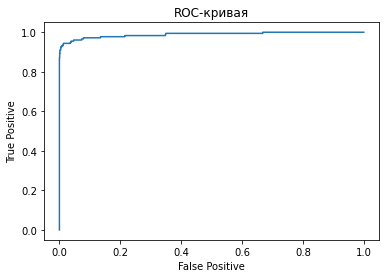

In [ ]:
### your code here
preds2 = model.predict_proba(X_te)
vector = preds2[:,1]
fpr, tpr, treshold = roc_curve(Y_te, vector)
plt.plot(fpr,tpr)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC-кривая')

### Selection of hyperparameter - regularization coefficient

There are as many features in our data as there are words in the dictionary. In linear models, there is a special tool that allows you to automatically select relevant features - regularization, or more precisely, Lasso (L1) regularization. When regularization is used, the regularizer is added to the quality functional that is optimized when training a linear model, which is the sum of moduli of weights multiplied by the regularization coefficient. The regularization coefficient determines the strength of the regularizer: if the coefficient is very small, the regularizer almost does not change the model, if the coefficient is very large, the regularizer interferes with the model to adjust to the data. If the Lasso-regularization coefficient is large enough, most of the weights in the model become zero, and the corresponding features are not used. The regularization coefficient is usually chosen using cross-validation.

First, let's see how many zero weights there are in the model without regularization (the one you have already trained). Recall that the model weights are stored in the coef\_ attribute of the model. Use numpy to calculate the percentage of weights that are 0:

In [ ]:
import numpy as np

In [ ]:
### your code here
print(100 - np.count_nonzero(model.coef_)/model.coef_.shape[1]*100)

14.059451394468041


Now train logistic regression with default Lasso-regularization coefficient. To do this, specify penalty='l1' when creating an object of class LogisticRegression:

In [ ]:
### your code here
model2 = LogisticRegression(penalty='l1', solver = 'liblinear')
model2.fit(X_tr, Y_tr)

LogisticRegression(penalty='l1', solver='liblinear')

What is the percentage of zero weights in the new model?

In [ ]:
### your code hre
print(100 - np.count_nonzero(model2.coef_)/model2.coef_.shape[1]*100)

97.81935039596006


Now let's find the regularization coefficient using crossvalidation. We will use GridSearchCV to do this:

In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV has the same interface as the classifier, with fit-predict. But, unlike the regular classifier, not one model is trained during the fit call, but several. In more detail:
1. For each variant of the regularization factor:
    1. Divide the sample into several blocks
    2. Repeat several times: select one block as a test sample, all other blocks as training ones. Train the model, calculate the quality on the test block.
    3. Average quality over all repetitions from the previous step.
2. Choose the regularization coefficient with the best average quality.
3. Retrain the model on all training data with the selected regularization coefficient.

As a result, when fit is called, the .best\_estimator\_ attribute will store the final model (you can do the same with it as with conventional logistic regression), and the .grid\_scores\_ attribute will store the history of all runs.

Write to the variable model\_for\_cv the model of logistic regression with the selected regularization "l1", and to the variable param\_grid - vector of regularization coefficients $1, 10, 100, \dots, 10^9$ (use numpy).

In [ ]:
model_for_gs = LogisticRegression(penalty='l1', solver = 'liblinear')
param_grid = np.geomspace(1, 10**10, num=10, endpoint=False)
gs = GridSearchCV(model_for_gs, \
                   {"C":param_grid}, \
                   verbose=3)

training:

In [ ]:
### your code here
gs.fit(X_tr, Y_tr)
gs.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .............................C=1.0;, score=0.977 total time=   0.0s
[CV 2/5] END .............................C=1.0;, score=0.978 total time=   0.0s
[CV 3/5] END .............................C=1.0;, score=0.982 total time=   0.0s
[CV 4/5] END .............................C=1.0;, score=0.980 total time=   0.0s
[CV 5/5] END .............................C=1.0;, score=0.981 total time=   0.0s
[CV 1/5] END ............................C=10.0;, score=0.984 total time=   0.0s
[CV 2/5] END ............................C=10.0;, score=0.980 total time=   0.0s
[CV 3/5] END ............................C=10.0;, score=0.982 total time=   0.0s
[CV 4/5] END ............................C=10.0;, score=0.977 total time=   0.0s
[CV 5/5] END ............................C=10.0;, score=0.981 total time=   0.0s
[CV 1/5] END ...........................C=100.0;, score=0.983 total time=   0.0s
[CV 2/5] END ...........................C=100.0;

LogisticRegression(C=1000.0, penalty='l1', solver='liblinear')

Let's draw a graph: regularization coefficient - quality:

Text(0, 0.5, 'accuracy')

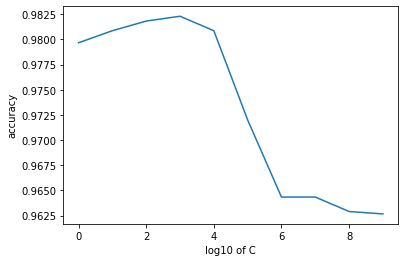

In [ ]:
cs = np.log10([elem for elem in gs.cv_results_['param_C']])
quals = [elem for elem in gs.cv_results_['mean_test_score']]
plt.plot(cs, quals)

plt.xlabel("log10 of C")
plt.ylabel("accuracy")

What is the optimal C? What happens when C is very large and very small? Note that in logistic regression, the regularization coefficient is actually $\frac 1 C$, that is, the larger C, the smaller the coefficient.

__Your comment:__
Optimally C = 1000, with very large and very small C the accuracy decreases

What is the proportion of zero weights in the model with the best C?

In [ ]:
## your code here
print(100 - np.count_nonzero(gs.best_estimator_.coef_)/gs.best_estimator_.coef_.shape[1]*100)

92.90715023528061


What quality does the model with the best C show on our deferred, test data?

In [ ]:
## your code here
predicty = gs.best_estimator_.predict(X_te)
te_accuracy2 = accuracy_score(Y_te, predicty)
te_accuracy2

0.9877961234745154

Compare the non-sparse (without regularization) and sparse (with optimal C) models in terms of quality on the test sample and the fraction of zero weights.

__Your comment:__
In the model without regularization the percentage of null weights was equal to 14%, in the model with regularization with optimal coefficient of regularization the percentage of null weights became equal to 93%, that is, most of the insignificant features were cancelled after regularization and the model became better predictors of data (as you can see by comparing the accuracy on the test sample before regularization (0.9870782483847811) and after regularization (0.9877961234745154) - after regularization the accuracy became larger).